In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
# Load the files
file_location = "C:\\Users\\bassa\\Downloads\\divorce\\divorce.xlsx"
df = pd.read_excel(file_location)
print(df.shape)

(170, 55)


In [12]:
f = open("C:\\Users\\bassa\\Downloads\\divorce\\Divorce.txt", "r")
print(f.read())

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and h

In [23]:
f[:10]

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [13]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Columns: 55 entries, Atr1 to Class
dtypes: int64(55)
memory usage: 73.2 KB


In [18]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [24]:
with open("C:\\Users\\bassa\\Downloads\\Divorce_README.txt") as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    

In [25]:
que = [x.split('\t')[1] for x in lines[2:]]
que[:5]

['If one of us apologizes when our discussion deteriorates, the discussion ends.',
 'I know we can ignore our differences, even if things get hard sometimes.',
 'When we need it, we can take our discussions with my spouse from the beginning and correct it.',
 'When I discuss with my spouse, to contact him will eventually work.',
 'The time I spent with my wife is special for us.']

In [28]:
# Descriptive statistics
values = dict()
que_cols = df.drop('Class',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'yellow',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,5.3%,8.2%,27.6%,18.2%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,13.5%,16.5%,22.4%,12.9%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,14.1%,15.3%,30.6%,10.0%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,7.1%,17.6%,18.8%,12.3%
The time I spent with my wife is special for us.,48.2%,5.9%,4.7%,25.9%,15.3%
We don't have time at home as partners.,50.6%,28.8%,17.1%,2.4%,1.2%
We are like two strangers who share the same environment at home rather than family.,67.1%,24.7%,2.9%,2.4%,2.9%
I enjoy our holidays with my wife.,47.6%,5.9%,12.3%,21.8%,12.3%
I enjoy traveling with my wife.,49.4%,4.1%,7.7%,28.8%,10.0%
Most of our goals are common to my spouse.,36.5%,10.6%,22.4%,20.0%,10.6%


### How to infer from the above summary?

For last question - I'm not afraid to tell my spouse about her/his incompetence - 33.5% people rated 4 while 8.8% people rated 3

Text(0.5, 1.0, 'Correlation value between ratings given for questions')

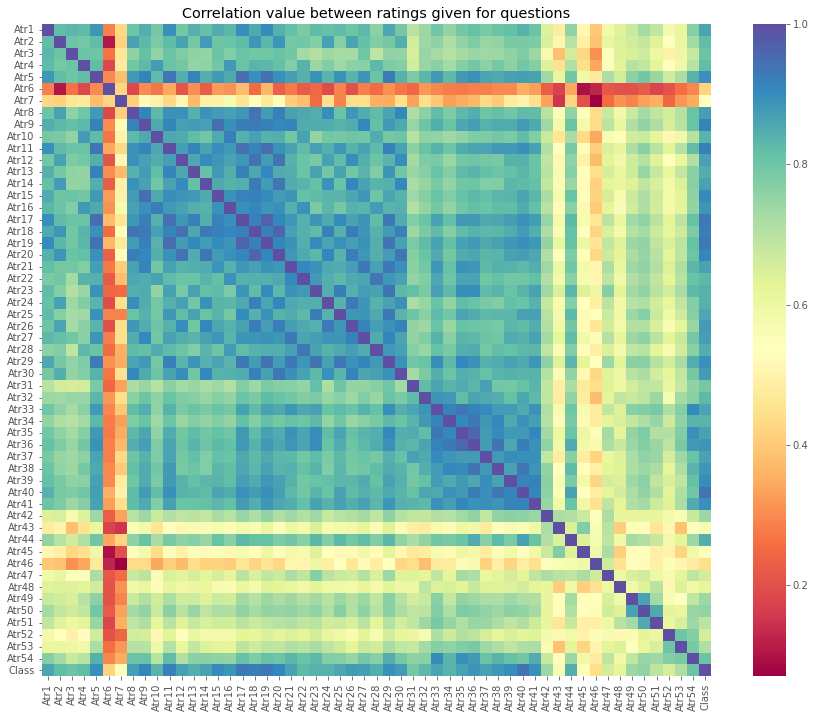

In [29]:
# Correlation study
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='Spectral')
plt.title("Correlation value between ratings given for questions")

Since most of the features are correlated with each other, its better to factor analysis

### Factor Analysis
Factor analysis is a linear statistical model, that is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms. Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables. (Source)

### Why Factor Analysis and not PCA?
- Both Principal Components Analysis (PCA) and Factor Analysis are dimension reduction techniques.
- Principal Component analysis makes the components that are completely orthogonal to each other whereas Factor analysis does not require such the factors to be orthogonal
- Principal Components is primarily an exploratory technique to rationalize the number of variables in an analysis (for further causal analysis). Factor analysis, on the other hand, is approached with a prior knowledge or belief that which variables may be similar and therefore should load on a single factor. Factor analysis is thus a popular variable reduction technique in market research.

### Test to check for adequacy
The following tests are used to check the adequacy to apply factor analysis to the dataset.

1. BARTLETT’S TEST OF SPHERICITY

2. KAISER-MEYER-OLKIN (KMO) TEST

### Bartlett's test of sphericity
H0 : Correlation matrix is an Identical matrix

H1 : Correlation matrix is not Identical matrix

In [32]:
data = df.drop('Class',axis=1)

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(data)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  17606.43007790314
p value :  0.0


The p-value < 0.05, correlation is present among the variables with 95% confidence interval

### KMO Test
KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. 
#### KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(data)
print(kmo_model)

0.9643724872807468


KMO score is close to 1, thus applying factor analysis can be effective for the dataset.

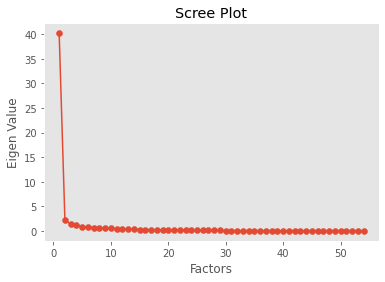

In [35]:
from factor_analyzer import FactorAnalyzer
n = data.shape[1]
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=n)
fa.fit(data)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### Factor Loading
Factor loading can tell us how each factor created is explaining each of the variable. More value says that factor explains well about that variable. Sorting the factor load values helps us understand which variables are grouped to represent a new factor.

In [36]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(data)
fa_load = pd.DataFrame(fa.loadings_,index=data.columns)

In [37]:
def highlight_max(s):
    # Get 5 largest values of the column
    is_large = s.nlargest(10).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1,2,3,4
Atr18,0.836865,0.327699,0.292841,0.200275,0.154872
Atr12,0.828267,0.310767,0.248492,0.167567,0.151989
Atr26,0.805294,0.348423,0.351402,0.059615,0.078859
Atr20,0.804204,0.380394,0.284953,0.160955,0.201407
Atr14,0.801431,0.333058,0.297584,0.118715,0.132737
Atr2,0.799304,0.312126,0.248137,0.007242,0.249143
Atr8,0.779464,0.399979,0.314565,0.054577,0.152865
Atr16,0.773158,0.329500,0.264030,0.300530,0.150878
Atr24,0.773062,0.367266,0.351396,0.042589,0.140685
Atr10,0.767630,0.352012,0.183620,0.240463,0.133885


In [38]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4
Variance          20.309095  12.237168  7.698707  2.489724  1.823362
Proportional Var   0.376094   0.226614  0.142569  0.046106  0.033766
Cumulative Var     0.376094   0.602709  0.745277  0.791383  0.825149


The new 5 factors created can explain 82.5% variance in the data.

### Model Prediction

In [40]:
X = data.copy()
y = df['Class'].copy()
X.shape, y.shape

((170, 54), (170,))

In [41]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(170, 5)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

k = 5
model = LogisticRegression()
scores = cross_val_score(model,X_transformed,y,cv=k)
print(f"{k} fold - cross validated scores - {scores}")
print(f"Average accuracy scores - {scores.mean()}")

5 fold - cross validated scores - [0.88235294 1.         1.         1.         1.        ]
Average accuracy scores - 0.9764705882352942


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 5), (85, 5), (85,), (85,))

In [44]:
# Build classification model
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [45]:
# Prediction
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.98        42

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [49]:
model.coef_

array([[ 3.08152118,  0.37168413,  0.34749321,  0.15738698, -0.06135314]])

By looking at the coeff, factor 0 is most significant feature that predicts the divorce

### Find the Optimal no of factors based on train-test accuracy

In [50]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
cv_scores = []

for f in range(2,54):
    transformer = FactorAnalysis(n_components=f, random_state=0)
    X_transformed = transformer.fit_transform(X)
    
    model = LogisticRegression()
    scores = cross_val_score(model,X_transformed,y,cv=5)
    cv_score = scores.mean()
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)
    
    model.fit(X_train,y_train)
    
    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)
    
    tr_acc = accuracy_score(y_train,y_pred_tr)
    ts_acc = accuracy_score(y_test,y_pred_ts)
    
    train_acc.append(tr_acc)
    test_acc.append(ts_acc)
    cv_scores.append(cv_score)

Text(0.5, 1.0, 'Factor analysis - Train acc vs Test acc vs CV score')

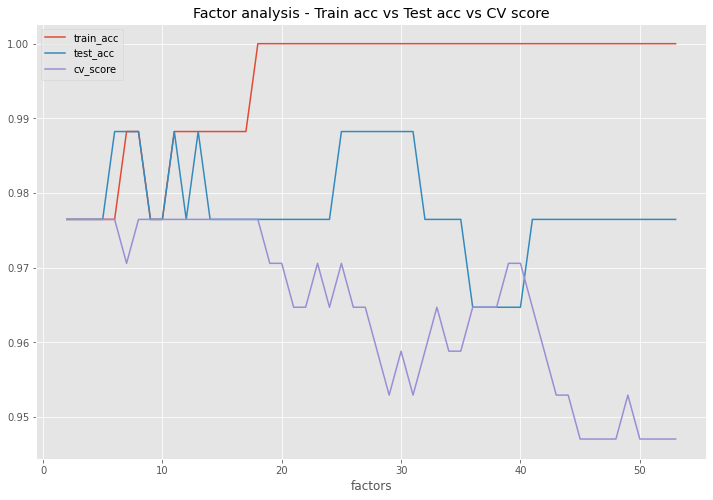

In [51]:
pd.DataFrame({'factors':range(2,54),
              'train_acc':train_acc,
              'test_acc':test_acc,
              'cv_score':cv_scores}).set_index('factors').plot(figsize=(12,8))
plt.title("Factor analysis - Train acc vs Test acc vs CV score")

By looking at the graph, the optimal number of factors can be decided between 5 - 14
As number of factors increases, the difference between train and test accuracy increases, which clearly indicates the overfitting